# LONGITUDINAL CHARACTERISTICS VECTOR
This Jupyter Notebook contains main functions to explore the longitudinal characteristics vector for all ASV in the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.linear_model import LinearRegression

from collections import Counter

In [2]:
#figure set
subject_cmap = {'male':'#d36135', 
        'female':'#ffb400' ,
        'donorA':'#227c9d', 
        'donorB':'#7fb069'}

noise_cmap = {0:'#0077b6', 1:'#ffd166'}

plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True
plt.rc('legend',fontsize=10, title_fontsize=10, edgecolor='k') # using a size in points

In [3]:
wd = './data/ready_files/'

In [4]:
male_df = pd.read_csv(wd + 'male_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
female_df = pd.read_csv(wd + 'female_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorA_df = pd.read_csv(wd + 'donorA_rarefied_18000_interpolated_pchip.tsv', sep = '\t', index_col = [0]).T
donorB_df = pd.read_csv(wd + 'donorA_rarefied_18000_interpolated_pchip.tsv', sep ='\t', index_col = [0]).T

def filter_dataset(data, treshold=150):
    
    df = data.iloc[:treshold]
    df_sum = df.sum().reset_index().sort_values(by = [0])
    keep_features = df_sum[df_sum[0] != 0]['index'].values
    data_filtered = df[keep_features]
    
    return data_filtered

donorB_df = filter_dataset(donorB_df)

datasets = [male_df, female_df, donorA_df, donorB_df]
subjects = ['male', 'female', 'donorA', 'donorB']

### Read longitudinal characteristics matrix

In [5]:
df = pd.read_csv('./data/ts_charactericstics_tables/LONGITUDINAL_CHARACTERISTICS_DF.csv')

In [6]:
df['ADF_stat'] = np.where(df['ADF_pvalue'].isna(), 'undefinded', df['ADF_stat'])
df['KPSS_stat'] = np.where(df['KPSS_pvalue'].isna(), 'undefinded', df['KPSS_stat'])

df['stationary'] = np.where(df['ADF_stat'] == 'undefinded', 'undefinded', df['stationary'])
df['stationary'] = np.where(df['stationary'] == 'undefinded', '2', df['stationary'])

## 1. WHITE NOISE
### 1.a white noise tests results

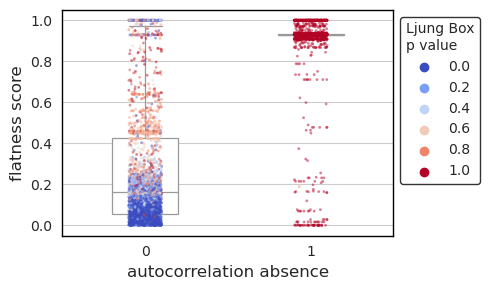

In [23]:
plt.figure(figsize = (5, 3))
sns.boxplot(x=df.acf_noise, y = df.flattness_score, color='white', fliersize = 0, linewidth=.9, width=.4)
sns.stripplot(x=df.acf_noise, y = df.flattness_score, hue = df.ljung_box_noise, palette = 'coolwarm', s=2, alpha=.5)
plt.legend(edgecolor='k', title='Ljung Box\np value', ncol=1, bbox_to_anchor=(1, 1))
plt.xlabel('autocorrelation absence', fontsize=12)
plt.ylabel('flatness score', fontsize=12)

/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


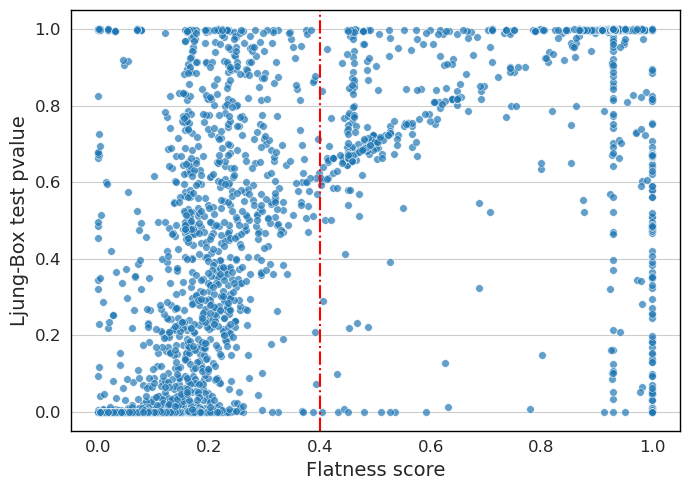

In [31]:
plt.figure(figsize = (7, 5))
sns.scatterplot(y=df.ljung_box_noise, x = df.flattness_score, alpha=.7, s=30, palette = noise_cmap, marker='o')
plt.ylabel('Ljung-Box test pvalue', fontsize=14)
plt.xlabel('Flatness score', fontsize=14)
plt.axvline(0.4, linestyle='-.', color='r')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

### 1b. WHITE NOISE vs PCA LOADING

/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if __name__ == "__main__":
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  app.launch_new_instance()


Text(0.5, -0.1, 'flatness score')

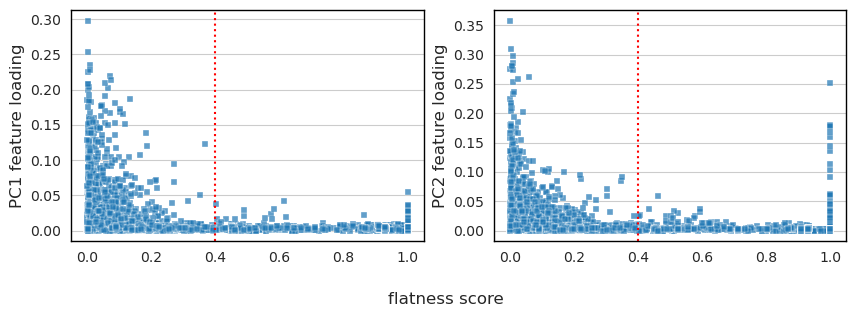

In [9]:
#analyse noise vs loadings
fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
sns.scatterplot(x = df.flattness_score, 
                y = df.PC1_loading, 
                marker='s', 
                alpha=.7, 
                s=20,
                palette = noise_cmap,
                ax=ax[0], legend=False)

sns.scatterplot(x = df.flattness_score, 
                y = df.PC2_loading, 
                marker='s', 
                alpha=.7,
                s=20,
                palette = noise_cmap,
                ax=ax[1], legend=False)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('PC1 feature loading', fontsize=12)
ax[1].set_ylabel('PC2 feature loading', fontsize=12)

ax[0].axvline(0.4, linestyle = ':', color='r')
ax[1].axvline(0.4, linestyle = ':', color='r')

fig.text(0.5, -0.1, 'flatness score', ha='center', fontsize=12)

### 1c. LjungBox test pvalue vs PCA loadings

/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if __name__ == "__main__":
/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


Text(0.5, -0.1, 'Ljung-Box test pvalue')

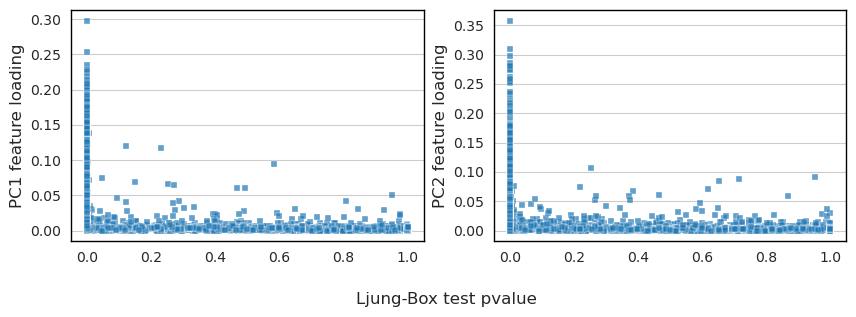

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3), sharex = True)
sns.scatterplot(x = df.ljung_box_noise, 
                y = df.PC1_loading, 
                marker='s', 
                alpha=.7, 
                s=20,
                palette = noise_cmap,
                ax=ax[0], 
                legend=False)

sns.scatterplot(x = df.ljung_box_noise, 
                y = df.PC2_loading, 
                marker='s', 
                alpha=.7,
                s=20,
                palette = noise_cmap,
                ax=ax[1],
                legend=False)

ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].set_ylabel('PC1 feature loading', fontsize=12)
ax[1].set_ylabel('PC2 feature loading', fontsize=12)

fig.text(0.5, -0.1, 'Ljung-Box test pvalue', ha='center', fontsize=12)

### 1d. white noise vs PCA loadings boxplots

In [11]:
df['loading'] = df.PC1_loading + df.PC2_loading

/home/MCB/zkarwowska/anaconda3/envs/time_series_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  del sys.path[0]


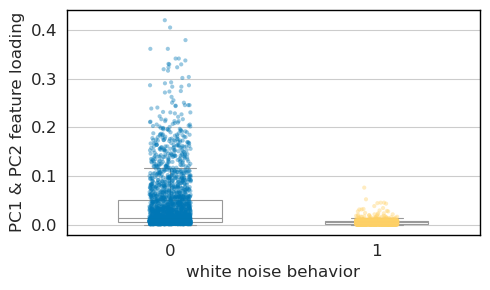

In [33]:
plt.figure(figsize = (5, 3))
sns.boxplot(x = df.white_noise_binary, 
            y = df.loading, 
            fliersize=0, 
            color='white',
            width=.5, 
            linewidth=.8)
sns.stripplot(x = df.white_noise_binary, 
            y = df.loading, 
              s=3, 
              alpha=.4, 
              edgecolor= 'k', 
              palette = ['#0077b6', '#ffd166']
             )

plt.ylabel('PC1 & PC2 feature loading', fontsize=12)
plt.xlabel('white noise behavior', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

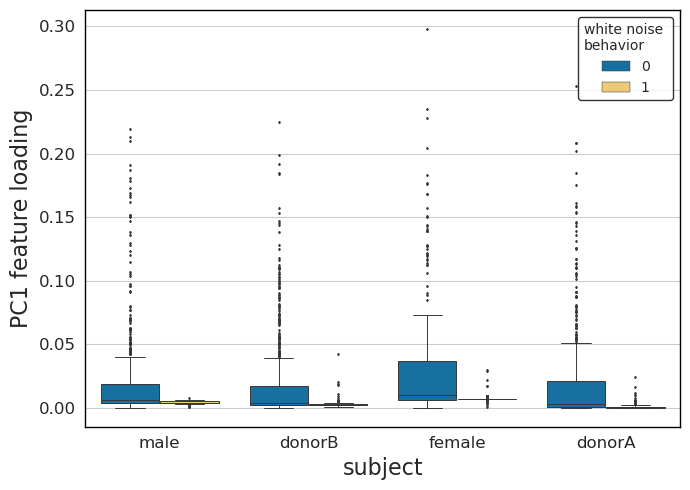

In [36]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = df.subject, 
            y = df.PC1_loading,
            hue = df['white_noise_binary'], 
            fliersize = 1, 
            width=.8,
            linewidth=.7,
           palette = noise_cmap)

plt.legend(title='white noise \nbehavior', edgecolor='k')

plt.ylabel('PC1 feature loading', fontsize=16)
plt.xlabel('subject', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

### 1d. white noise per person

In [14]:
WHITE_NOISE_DF = pd.DataFrame()
for i in range(0, 4):
    
    d=Counter(df[df['subject'] == subjects[i]].white_noise_binary)
    res_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
    res_df.columns = ['white noise behavior', 'count']
    res_df = res_df.set_index('white noise behavior').T
    res_df['subject'] = subjects[i]
    WHITE_NOISE_DF = pd.concat([WHITE_NOISE_DF, res_df])
    
WHITE_NOISE_DF = WHITE_NOISE_DF.set_index('subject')
WHITE_NOISE_DF['total'] = WHITE_NOISE_DF.sum(axis=1)
WHITE_NOISE_DF=WHITE_NOISE_DF.reset_index()

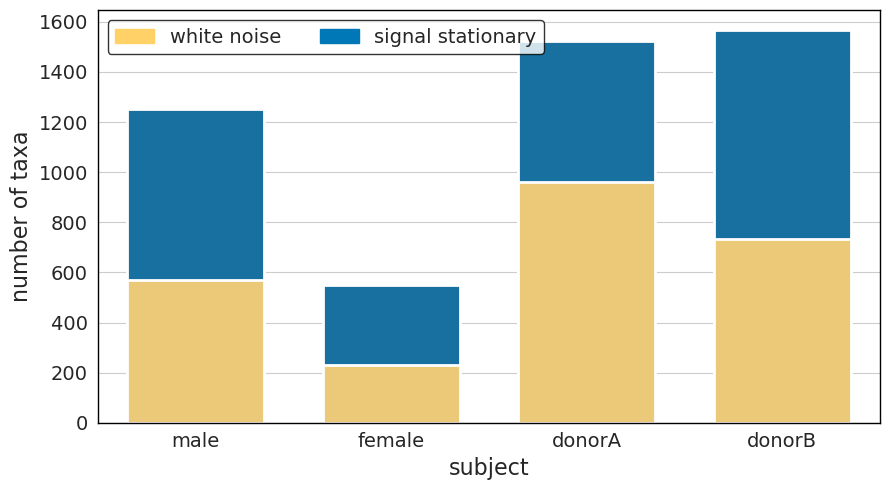

In [41]:
palette = ['#0077b6', '#ffd166']
plt.figure(figsize = (9, 5))
sns.barplot(data = WHITE_NOISE_DF, x = 'subject', y = 'total', color = '#0077b6', edgecolor='w', lw=2, errorbar=None, width = .7)
sns.barplot(data = WHITE_NOISE_DF, x = 'subject', y = WHITE_NOISE_DF[1], color = '#ffd166', edgecolor='w', lw=2, errorbar=None, width = .7)

signal_patch = mpatches.Patch(color='#0077b6', label='signal stationary')
wn_patch = mpatches.Patch(color='#ffd166', label='white noise')

plt.legend(handles=[wn_patch, signal_patch], ncol=3, edgecolor='k', fontsize=14)#, bbox_to_anchor = (1, 1.15), loc='upper right')
plt.ylabel('number of taxa', fontsize = 16)
plt.xlabel('subject', fontsize = 16)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

## 2. STATIONARITY

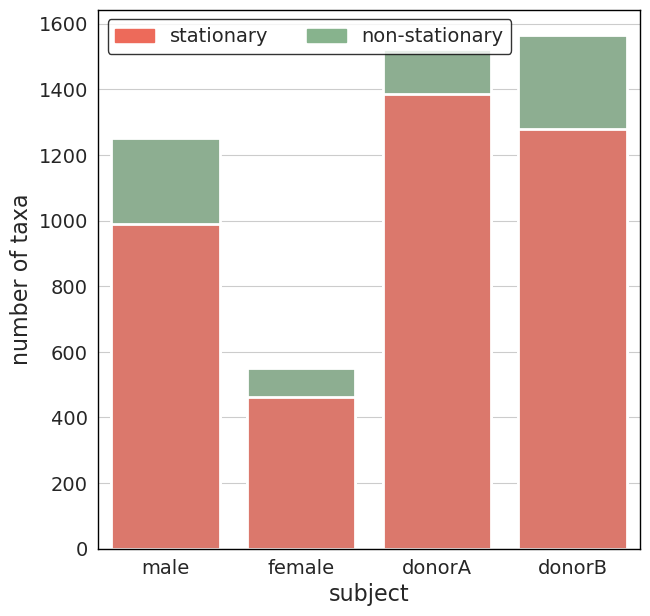

In [44]:
df['stationarity'] = np.where((df['ADF_stat'] == 1) | (df['KPSS_stat'] == 1), 'non-stationary', 'stationary')
df['stationarity'] = np.where(df['ADF_stat'] == 'undefinded', 'undefined', df['stationarity'])
df = df[df['stationarity'] != 'undefined']

STATIONARY_DF = pd.DataFrame()
for i in range(0, 4):
    
    d=Counter(df[df['subject'] == subjects[i]].stationary)
    res_df = pd.DataFrame.from_dict(d, orient='index').reset_index()
    res_df.columns = ['behaviour', 'count']
    res_df = res_df.set_index('behaviour').T
    res_df['subject'] = subjects[i]
    STATIONARY_DF = pd.concat([STATIONARY_DF, res_df])
    
STATIONARY_DF = STATIONARY_DF.set_index('subject')
STATIONARY_DF['total'] = STATIONARY_DF.sum(axis=1)
STATIONARY_DF.columns = ['stationary', 'non_stationary',  'total']


plt.figure(figsize = (7, 7 ))
sns.barplot(data=STATIONARY_DF, x = STATIONARY_DF.index, y=STATIONARY_DF.total, color='#87b38d', edgecolor='w', lw=2)
sns.barplot(data=STATIONARY_DF, x = STATIONARY_DF.index, y=STATIONARY_DF['stationary'], color='#ed6a5a', edgecolor='w', lw=2)


signal_patch = mpatches.Patch(color='#ed6a5a', label='stationary')
wn_patch = mpatches.Patch(color='#87b38d', label='non-stationary')

plt.legend(handles=[signal_patch, wn_patch], 
           edgecolor='k', ncol=2, fontsize=14)

plt.ylabel('number of taxa', fontsize = 16)
plt.xlabel('subject', fontsize = 16)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

## 3. TREND

Text(0.5, 0, 'subject')

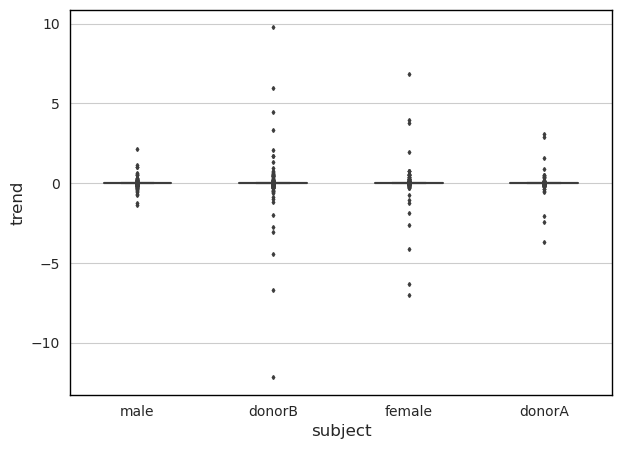

In [45]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = df.subject, y = df.trend, fliersize = 2, width=.5)
plt.ylabel('trend', fontsize = 12)
plt.xlabel('subject', fontsize = 12)

## 4. PREVALENCE

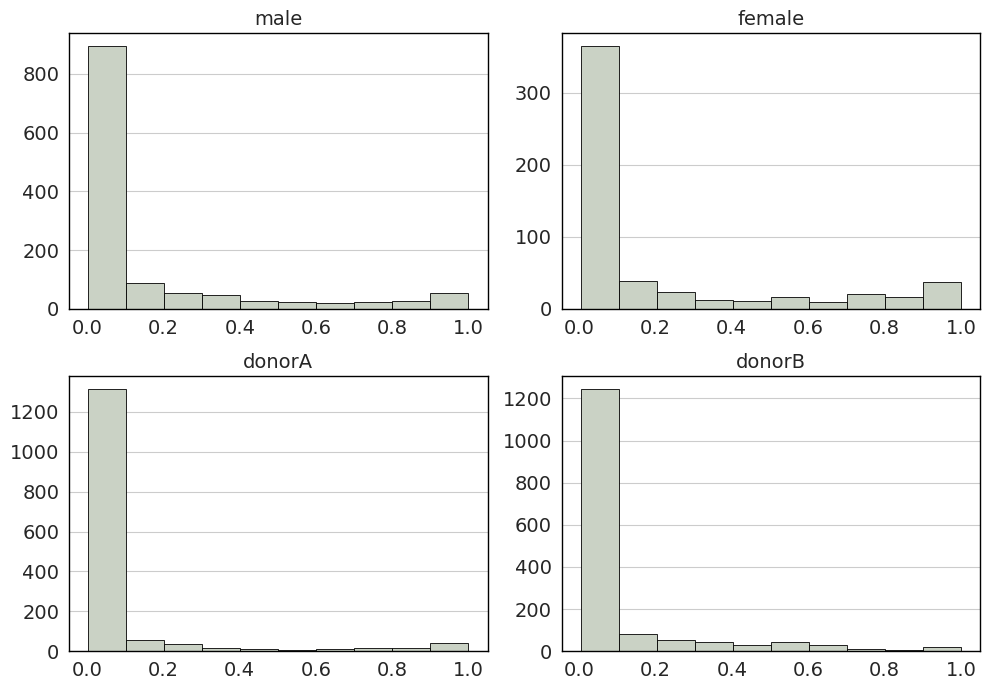

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10, 7))

kwargs ={'color': '#cad2c5', 'edgecolor':'k', 'lw':.6}

ax[0, 0].hist(df[df['subject'] == subjects[0]].prevalence.values, **kwargs)
ax[0, 1].hist(df[df['subject'] == subjects[1]].prevalence.values, **kwargs)
ax[1, 0].hist(df[df['subject'] == subjects[2]].prevalence.values, **kwargs)
ax[1, 1].hist(df[df['subject'] == subjects[3]].prevalence.values, **kwargs)

ax[0, 0].set_title('male', size=14)
ax[0, 1].set_title('female', size=14)
ax[1, 0].set_title('donorA', size=14)
ax[1, 1].set_title('donorB', size=14)

ax[0, 0].tick_params(axis='both', which='major', labelsize=14)
ax[0, 0].tick_params(axis='both', which='minor', labelsize=14)

ax[0, 1].tick_params(axis='both', which='major', labelsize=14)
ax[0, 1].tick_params(axis='both', which='minor', labelsize=14)

ax[1, 0].tick_params(axis='both', which='major', labelsize=14)
ax[1, 0].tick_params(axis='both', which='minor', labelsize=14)

ax[1, 1].tick_params(axis='both', which='major', labelsize=14)
ax[1, 1].tick_params(axis='both', which='minor', labelsize=14)


## 5. AUTOCORRELATION

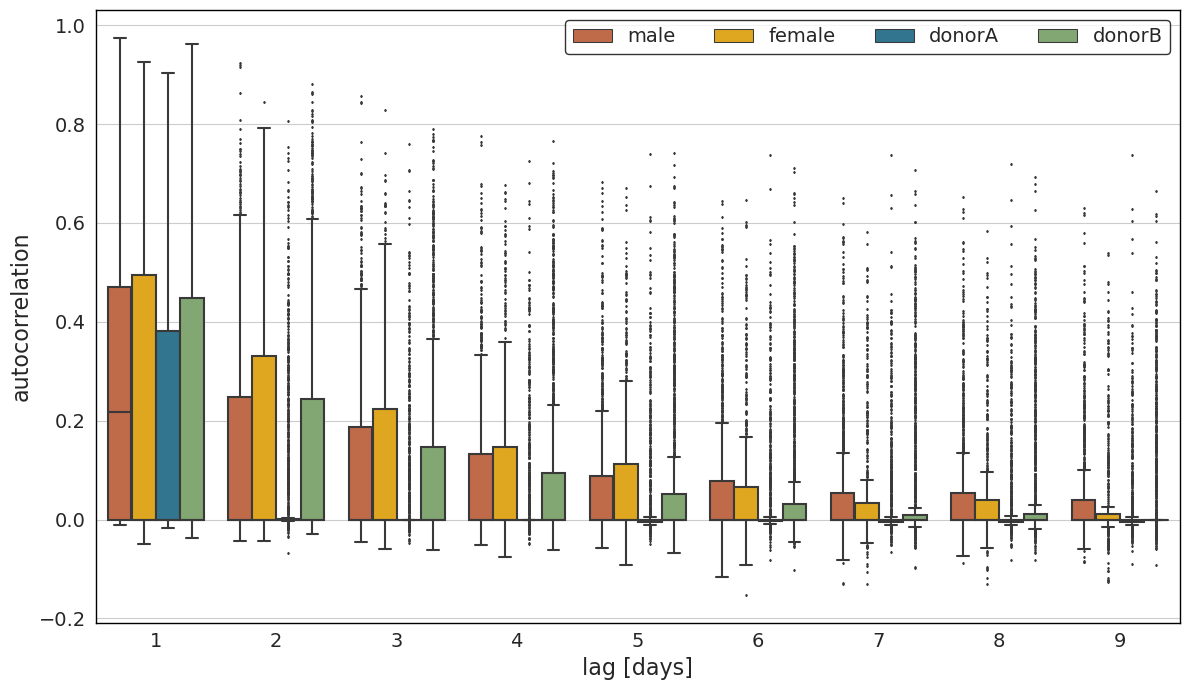

In [54]:
autocorr_df = pd.read_csv('./data/ts_charactericstics_tables/autocorrelation.csv', index_col = [0])

plt.figure(figsize = (12, 7))
sns.boxplot(data=autocorr_df, x = 'lag', y = 'acf_adj', hue='subject', fliersize=1, palette = subject_cmap)
plt.xlabel('lag [days]',fontsize=16)
plt.ylabel('autocorrelation',fontsize=16)

plt.legend(fontsize=14, ncol=4)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

## 6. FEATURES HEATMAP

In [20]:
df_corr = df[['std', 'mean','prevalence', 'PC1_loading', 'PC2_loading','flattness_score', 'dominant_seasonality_adj',#'dominant_mode_score',
              'seasonal', 'trend', 'stationary', 'non_stationary', 'white_noise_binary', 'lag_1_corr', 'lag_2_corr', 'lag_3_corr']]

df_corr = df_corr.astype(float)
df_corr.columns = ['standard deviation',
                   'mean',
                   'prevalence',
                   'PC1 loading',
                   'PC2 loading',
                   'flatness score',
                   'dominant seasonality adj',
                   'seasonal',
                   'trend',
                   'stationarity',
                   'non stationarity', 
                   'white noise behavior',
                   '1st lag ACF',
                   '2nd lag ACF',
                   '3rd lag ACF']

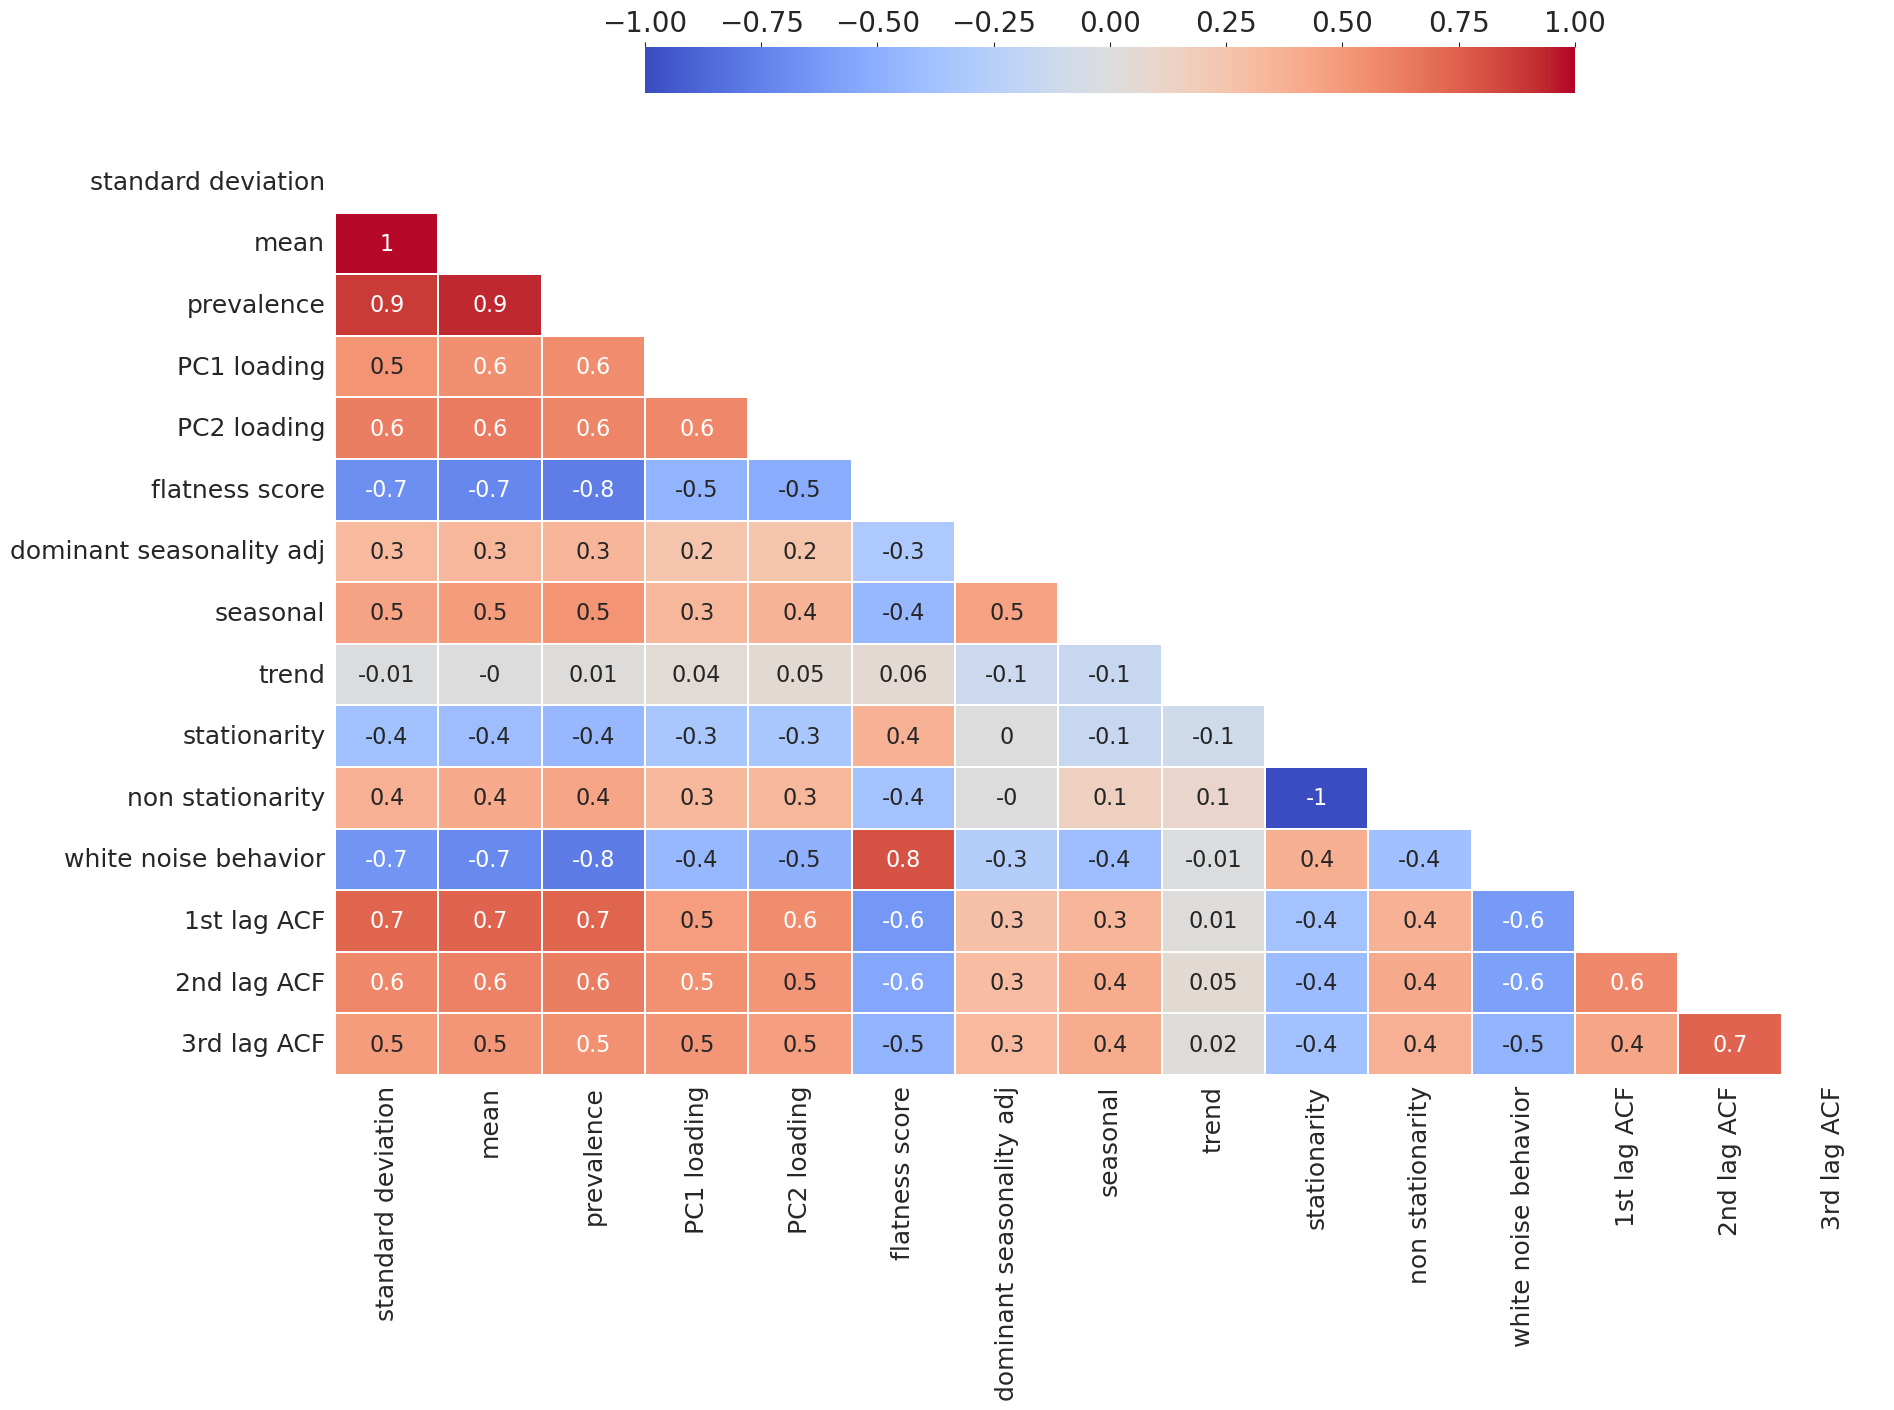

In [61]:
corr_matrix = df_corr.corr(method='spearman')              
corr_matrix = np.round(corr_matrix, 2)
mask_con_corr = corr_matrix[(corr_matrix >= 0.1) | (corr_matrix <= -0.1)]

matrix = np.triu(mask_con_corr)

plt.figure(figsize = (20, 15))
ax = sns.heatmap(corr_matrix, annot=True, edgecolor='black', lw=1.3, fmt='.1g', cmap = 'coolwarm', mask=matrix, vmin=-1, vmax=1,
            cbar_kws={"shrink": .6, "orientation": "horizontal", "location":"top"}, annot_kws={"size": 16})
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)